# Biomedical Data Analysis - Lab 4

Group members:

- Enrico Maria Marinelli
- Francesco Pio Capoccello
- Juras LukaŠevičius

### Libraries used in practical session:

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from IPython.display import HTML
from scipy.stats import pearsonr
import regex as re

## Block I - Data loading and basic description

We load the dataset using the pandas’ load_csv function, remember to specify semicolon (;) as
the separator

In [135]:
df=pd.read_csv("../BiomedicalDataScience_LAB04//Data/inadvance_synth.csv",sep=";")

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           38416 non-null  int64  
 1   age                  38416 non-null  int64  
 2   barthel              10218 non-null  float64
 3   charlson             38339 non-null  float64
 4   codidiagingreso      27038 non-null  object 
 5   codservicioreal      38416 non-null  object 
 6   creatinina           30465 non-null  float64
 7   drg                  34776 non-null  float64
 8   estancias            38416 non-null  float64
 9   glucosa              29188 non-null  float64
 10  hematocrito          30114 non-null  float64
 11  leucocitos           30114 non-null  float64
 12  metastatic_tumor     38339 non-null  float64
 13  num_grupoact3_HOSP   17415 non-null  float64
 14  numurgenciasprevias  37864 non-null  float64
 15  potasio              29770 non-null 

### 1. What is the size of the dataframe?

In [137]:
# Drop the "Unnamed" column
df = df.iloc[:,1:]

In [138]:
df.shape

(38416, 21)

### 2. What is the mean age?

In [139]:
mean = df.age.mean()
print(mean)

79.4033215326947


### 3. What is the age standard deviation (std)?

In [140]:
std=df.age.std()
print(std)

8.361737254115944


### 4. Which is the variable with the most amount of missing values? Can you list the name of the variables, sorting them by number of missing values?

In [141]:
def nullvalues(df=df):
    nullvalues = df.isnull().sum()
    features_sorted = nullvalues.sort_values(ascending=False)
    return features_sorted
print(nullvalues())

barthel                28198
num_grupoact3_HOSP     21001
proteina_c_reactiva    18175
urea                   14260
codidiagingreso        11378
glucosa                 9228
potasio                 8646
rdw_sd                  8334
rdw_cv                  8334
hematocrito             8302
leucocitos              8302
sodio                   8142
creatinina              7951
drg                     3640
numurgenciasprevias      552
metastatic_tumor          77
charlson                  77
age                        0
estancias                  0
codservicioreal            0
label                      0
dtype: int64


### 5. Name which are the categorical variables.

In [142]:
categorical_variables = df.select_dtypes(include=['object'])
categorical_variables_names = categorical_variables.columns.tolist()
print(categorical_variables_names)

['codidiagingreso', 'codservicioreal']


In [143]:
def find_cat(x):
    if isinstance(x,str):
        pattern = r'[0-9]+.?[0-9]*'
        test = not (re.match(pattern, x))
        # print(f"{x}: {test}")  # Add this line for debugging
        return test
    # print(f"{x}: False")  # Add this line for debugging
    return False

In [144]:
def categorical_enumeration(cat,categorical_variables=categorical_variables, printing=True):
  
  if printing:
    print('Evaluation of categorical variable "' + cat + '"')

  # categories = categorical_variables[categorical_variables[cat].apply(find_cat)]
  # if cat == categorical_variables_names[0]:
  #   categories = categorical_variables[categorical_variables[cat].apply(find_cat)]
  # else:
  categories = categorical_variables[cat].astype(str)
  

  unique, count = np.unique(categories, return_counts=True)


  if printing:
    print('Number of categories for "'+ cat + '":', len(unique))
  
  combined = np.column_stack((unique, count))
  sorted_combined = combined[combined[:, 1].argsort()[::-1]]
  
  if printing:
    for i in sorted_combined:
      if isinstance(i[0],float):
        print("Class %f has %d samples" % (i[0],i[1]))
      else:
        print("Class " + str(i[0]) + " has %d samples" % i[1])
  
  return np.array(sorted_combined)

In [145]:
categories_codidiagingreso = categorical_enumeration(categorical_variables_names[0])

Evaluation of categorical variable "codidiagingreso"
Number of categories for "codidiagingreso": 2039
Class nan has 11378 samples
Class 401.9 has 2734 samples
Class 518.81 has 643 samples
Class 486 has 533 samples
Class 250.00 has 532 samples
Class 414.9 has 511 samples
Class 427.31 has 450 samples
Class 466.0 has 437 samples
Class 599.0 has 417 samples
Class 428.0 has 391 samples
Class 428.9 has 391 samples
Class 491.21 has 322 samples
Class 414.01 has 284 samples
Class 578.9 has 265 samples
Class V14.8 has 245 samples
Class 560.9 has 231 samples
Class 577.0 has 206 samples
Class 518.84 has 204 samples
Class 272.4 has 201 samples
Class 585.9 has 197 samples
Class V15.82 has 195 samples
Class 575.0 has 191 samples
Class V14.0 has 181 samples
Class 995.91 has 157 samples
Class 428.1 has 156 samples
Class 491.22 has 154 samples
Class 584.9 has 153 samples
Class 425.4 has 148 samples
Class 424.1 has 146 samples
Class 511.9 has 137 samples
Class 491.20 has 133 samples
Class 507.0 has 127 s

In [146]:
categories_codservicioreal = categorical_enumeration(categorical_variables_names[1])

Evaluation of categorical variable "codservicioreal"
Number of categories for "codservicioreal": 53
Class HMUR has 8233 samples
Class HNEM has 5422 samples
Class HCAR has 5124 samples
Class HMIN has 3633 samples
Class HNER has 2341 samples
Class HMDG has 2222 samples
Class HONC has 2041 samples
Class HUHP has 1159 samples
Class HURO has 1112 samples
Class HCDG has 1007 samples
Class HCOT has 741 samples
Class HHEM has 546 samples
Class HNEF has 522 samples
Class HCVA has 502 samples
Class HMDH has 472 samples
Class HCEP has 420 samples
Class HNCG has 381 samples
Class HUMI has 351 samples
Class HUEI has 332 samples
Class HCCV has 308 samples
Class HREU has 252 samples
Class HORL has 179 samples
Class HREA has 157 samples
Class HCTO has 154 samples
Class HCIR has 146 samples
Class HECR has 126 samples
Class HCLP has 71 samples
Class HSEP has 60 samples
Class HGIN has 55 samples
Class HUTP has 50 samples
Class HCMX has 49 samples
Class HUML has 44 samples
Class HCPL has 43 samples
Class 

In addition to the existing `codidiagingreso` and `codservicioreal` categorical variables including codes in the format 
```python 
str
```
is `metastatic_tumor`, since its only values are $0$ and $1$.

### 6. Extract the ‘label’ column to another variable. How many positive cases there are? And negatives?


In [147]:
label_var = df['label']
positive = df[label_var==1].shape[0]
negative = df[label_var==0].shape[0]
print(f"Positive cases: {positive}")
print(f"Negative cases: {negative}")

Positive cases: 13431
Negative cases: 24985


## Block II. Data preprocessing

### 1. Train-Test Split

How many samples have each set after the split?

Split the dataset in two: train (80%) and test (20%). Use a seed to allow replication.

In [148]:
seed = 42

In [149]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [150]:
rows_train = X_train.shape[0]
rows_test = X_test.shape[0]
cols = X_train.shape[1]

print(f"Train samples: {rows_train}")
print(f"Test samples: {rows_test}")
print(f"Features: {cols}")

Train samples: 30732
Test samples: 7684
Features: 20


### 2 Categorical Variables

Implement the method to deal with categorical variables. Briefly explain the chosen alternative. What
would happen if a variable in the test set contains a category that doesn’t exist on the train set? How
would you deal with this situation?

#### Categories: `codidiagingreso` and `codservicioreal`

In [151]:
def categorical_evaluation(df,alpha=10):
    
    #
    # alpha variable represents how much weight the feature "metastatic tumor"
    # has on the categorical variable.
    # This choice is given by the fact that features might need to be more spread out.
    #
    # NOTE: alpha is not an tunable hyperparameter, but might need to be suggested by a 
    # medic or someone who has knowledge in the field.
    # It has been set to 10 by default to spread more the low frequency variables, 
    # but might be not a  correct assumption

    dataset = df.copy()
    cv = dataset.select_dtypes(include=['object'])
    for cat in cv.columns.tolist():
        enum = categorical_enumeration(cat=cat,categorical_variables=cv,printing=False)
        
        # The ranking process starts here
        mapping = {}
        for i,e in enumerate(enum[:,0]):

            # Increase the feature "importance rank" by a slight correlation with metastatic tumor variable
            # only for low frequency variables
            if enum[i,1]<5:
                increase = np.sum(np.logical_and(dataset['metastatic_tumor']==1,dataset[cat]==e))
            
                # This increase is regulate by the aforementioned alpha parameter 
                enum[i,1] += enum[i,1]*(alpha*increase) 

            enum[i,1] /= np.sum(enum[:,1]) # Represent the percentage of appearance in the given dataset (instead of the frequency)
            mapping[e] = enum[i,1]
        dataset[cat] = dataset[cat].map(mapping)
        dataset[cat] = dataset[cat].astype(float,errors='ignore')  # 'coerce' will handle non-convertible values
        # filter = np.logical_and(dataset.isnull(),np.logical_not(df.isnull()))
        # print(df[filter])


        
    
    
    #nullvalues(dataset)
    return dataset


In [152]:
X_train_categorical_mapped = categorical_evaluation(X_train)
X_test_categorical_mapped = categorical_evaluation(X_test)

In [153]:
X_train_categorical_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30732 entries, 29147 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30732 non-null  int64  
 1   barthel              8222 non-null   float64
 2   charlson             30673 non-null  float64
 3   codidiagingreso      21601 non-null  float64
 4   codservicioreal      30732 non-null  float64
 5   creatinina           24410 non-null  float64
 6   drg                  27841 non-null  float64
 7   estancias            30732 non-null  float64
 8   glucosa              23372 non-null  float64
 9   hematocrito          24144 non-null  float64
 10  leucocitos           24144 non-null  float64
 11  metastatic_tumor     30673 non-null  float64
 12  num_grupoact3_HOSP   13964 non-null  float64
 13  numurgenciasprevias  30284 non-null  float64
 14  potasio              23860 non-null  float64
 15  proteina_c_reactiva  16210 non-null  

### 3.1 Dealing with Categorical Variables missing

Here we decide to discard the categorical mapping approach in favour of an **encoding approach**, that let us achieve better results 

and is more robust with respect to data acquired.

In [154]:
countTrain = X_train['codidiagingreso'].value_counts()
countTest = X_test['codidiagingreso'].value_counts()

In [ ]:
median_train = X_train['codidiagingreso'].apply(pd.to_numeric, errors='coerce').median()

X_train['codidiagingreso'].fillna(median_train, inplace=True)

In [ ]:
median_test = X_test['codidiagingreso'].apply(pd.to_numeric, errors='coerce').median()

X_test['codidiagingreso'].fillna(median_test, inplace=True)

In [ ]:
X_train.info()

In [155]:
print(X_test['codidiagingreso'].isnull().sum(),X_train['codidiagingreso'].isnull().sum())

0 0


 We use the function pd.to_numeric() to attempt to convert the values in the "codidiagingreso" column to numbers. The errors='coerce' option causes non-numeric values to be replaced with NaN (Not a Number) during the conversion. At the end of this operation, we get a Series of numeric values and NaN.

After converting the values to numbers (and replacing the non-numeric values with NaN), we calculate the median of this Series. The median is calculated by ignoring NaN values, so you get the median only from the valid numeric values in the "codidiagingreso" column.
At the end we use the value found in the median to fill in the training and test null values with the median value calculated in the previous step.

#### Category: `metastatic_tumor`

In [157]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 21))


mean_scores = []
for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    imputed_data = imputer.fit_transform(X_train[['metastatic_tumor']])


    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, imputed_data, y_train, cv=10, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(scores))


best_k = k_values[np.argmin(mean_scores)]
print("The best number of neighbors is", best_k)

The best number of neighbors is 1


In summary, the code performs a search for the best value of k for a KNN-based regression model. It uses cross-validation to evaluate the performance of the model on training data and determine which number of neighbors gives the best result in terms of mean square error. The process helps select an optimal k value for the KNN model based on the data provided.

In [158]:
imputer = KNNImputer(n_neighbors=1)
metastatic_tumor_train = X_train[['metastatic_tumor']]
metastatic_tumor_test = X_test[['metastatic_tumor']]

X_train_imputed = imputer.fit_transform(metastatic_tumor_train)
X_train['metastatic_tumor'] = X_train_imputed

X_test_imputed = imputer.transform(metastatic_tumor_test)
X_test['metastatic_tumor'] = X_test_imputed

In this part, imputer_train and imputer_test are two separate objects of KNNImputer. imputer_train is used to train and impute data in the training set, while imputer_test is used to train and impute data in the test set.

This ensures that two separate imputation models are used for the two data sets while maintaining the diversity between the imputations in the two sets.

### 3.2 Dealing with Numerical Values missing

Implement the method to deal with the missing values. Briefly explain the chosen alternative. What
would happen if a variable without missing on the train set appears to have been missing in the test
set? How would you deal with them?

In [159]:
# Test to verify consistency of flatten and reshape functions
# heavily used in the SVT algorithm later defined 

# mat = X_full.shape
# vect = X_full.shape[0]*X_full.shape[1]
# mask = (X_full.copy().flatten().reshape(mat) == X_full).flatten()
# (X_full.flatten()[mask]-X_full.copy().flatten().reshape(mat).flatten()[mask]).sum()

In [160]:
(X_train['age'] == 65).sum()

748

In [161]:
avoid_categoricals = X_test.columns.to_list()
categorical_variables_names.append('metastatic_tumor')
for i in categorical_variables_names:
    avoid_categoricals.remove(i)
avoid_categoricals

['age',
 'barthel',
 'charlson',
 'creatinina',
 'drg',
 'estancias',
 'glucosa',
 'hematocrito',
 'leucocitos',
 'num_grupoact3_HOSP',
 'numurgenciasprevias',
 'potasio',
 'proteina_c_reactiva',
 'rdw_cv',
 'rdw_sd',
 'sodio',
 'urea']

<h2>Singular Value Thresholding (SVT)</h2>

**SVT** is a technique used in signal processing and matrix completion problems. It's primarily employed in scenarios where you have a matrix with missing or corrupted data, and you want to estimate the missing values based on the available information.

First of all we divide into two sets *Test* and *Train* the dataset in input.

Let us denote by $\Omega_{train}$ the set of observations in the train set, i.e. the values appearing in the original dataset corresponding to the train set,

similarly $\Omega_{\text{test}}$ is the set of observation in the test set.
Let us denote by $r_{ij}$ the corresponding rating.

Create a full matrix $X \in \mathbb{R}^{n \times p}$, such that:
$$
X_{i,j} = 
\begin{cases}
r_{ij} & \text{if } (i,j) \in \Omega\\
0& \text{otherwise}
\end{cases}
$$

Then the algorithm is based on a iterative procedure for `n_max_iter`,

A *Singular Value Decomposition*, using `np.linalg.svd`,

a thresholding on the singular values based on `threshold`,

a `tolerance` that at each iteration is compared to the norm of the difference of the old matrix and the reconstructed new one,

the error is evaluated through:

the RMSE (root mean square error)
$$
\text{RMSE} = \sqrt{\frac{1}{card(\Omega_{\text{test}})} \sum_{(i,j) \in \Omega_{\text{test}}} (r_{ij} - r^{\text{pred}}_{ij})^2}
$$

and the Pearson correlation coefficient $\rho$, using `scipy.stats.pearsonr`:
$$
\rho = 
\frac
{
    \displaystyle\sum_{(i,j) \in \Omega_{\text{test}}} 
       (r_{ij} - \overline{r})
       (r^{\text{pred}}_{ij} - \overline{r}^{\text{pred}})
}
{\sqrt{
    \displaystyle\sum_{(i,j) \in \Omega_{\text{test}}} 
       (r_{ij} - \overline{r})^2
       }
\sqrt{
    \displaystyle\sum_{(i,j) \in \Omega_{\text{test}}} 
       (r^{\text{pred}}_{ij} - \overline{r}^{\text{pred}})^2
       }}
$$
where
$$
\begin{split}
\overline{r} &= \frac{1}{card(\Omega_{\text{test}})} \sum_{(i,j) \in \Omega_{\text{test}}} 
       r_{ij} 
\\
\overline{r}^{\text{pred}} &= \frac{1}{card(\Omega_{\text{test}})} \sum_{(i,j) \in \Omega_{\text{test}}} 
       r^{\text{pred}}_{ij} 
\end{split}
$$

In [162]:
def SVT(X_input, \
        n_max_iter = 100, \
        threshold = 1000, \
        show=True, \
        tt_split = 0.2,
        tolerance = 1e-5, \
        seed=seed):
  
  X_input = X_input.to_numpy()
  mat = X_input.shape
  
  np.random.seed(seed) # for reproducibility
  indexes = np.random.permutation(mat[0])

  
  
  X = X_input.copy()[indexes]
  

  split = round(tt_split*mat[0])
  X_train = X[split:] # with non-null values
  X_test = X[:split] # with null values


  X_train = X_train.flatten()
  X_test = X_test.flatten()
  
  train_valid = ~np.isnan(X_train)
  vals_train = X_train[train_valid]

  test_valid = ~np.isnan(X_test)
  vals_test = X_test[test_valid]


  RMSE_SVT_history = []
  pearson_SVT_history = []

  X = np.append(X_train,X_test)
  X[np.isnan(X)] = 0

  X_hat = X.copy()
  for k in range(n_max_iter):
    X_hat_old = X_hat.copy()
    X_hat = X_hat.reshape(mat)
    U,s,VT = np.linalg.svd(X_hat, full_matrices = False)
    s[s < threshold] = 0
    X_hat = U @ np.diag(s) @ VT

    X_hat_train = X_hat[split:].flatten()
    X_hat_test = X_hat[:split].flatten()
    X_hat_train[train_valid] = vals_train

    X_hat = np.append(X_hat_train,X_hat_test)
    increment = np.linalg.norm(X_hat - X_hat_old)
    

    vals_test_SVT = X_hat_test[test_valid]
    RMSE_SVT = np.sqrt(np.mean((vals_test - vals_test_SVT)**2))
    pearson_SVT = pearsonr(vals_test, vals_test_SVT)[0]

    RMSE_SVT_history.append(RMSE_SVT)
    pearson_SVT_history.append(pearson_SVT)
    
    if show:
      print('======= iteration %d (increment %1.2e)' % (k, increment))
      print('RMSE = %f' % RMSE_SVT)
      print('rho = %f' % pearson_SVT)
    
    if tolerance > increment:
      break


  X_hat = X_hat.reshape(mat)
  X_hat_train = X_hat[split:].flatten()
  X_hat_test = X_hat[:split].flatten()

  X_hat_train[train_valid] = vals_train
  X_hat_test[test_valid] = vals_test

  X_hat = np.append(X_hat_train,X_hat_test)
  X_hat = X_hat.reshape(mat)


  X_hat = X_hat[-indexes]
  X_hat = pd.DataFrame(data=X_hat,columns=avoid_categoricals)
  X_hat['age'] = X_hat['age'].astype(int) 
  
  if show:
    fig, axs = plt.subplots(2,1,figsize = (8,8))
    axs[0].loglog(RMSE_SVT_history, 'o-')
    axs[1].semilogx(pearson_SVT_history, 'o-')

  return X_hat

In [163]:
X_train_cat = X_train[categorical_variables_names]
X_train_avoid = X_train[avoid_categoricals]

In [164]:
# Train Dataset SVT
X_train_prev = X_train_avoid
X_train_avoid = SVT(X_train_avoid,threshold=100,show=False)

In [165]:
print(f"Values for \"age\" previous to SVT: {(X_train_prev['age'] == 65).sum()}")
print(f"Values for \"age\" posterior to SVT: {(X_train_avoid['age'] == 65).sum()}")

Values for "age" previous to SVT: 748
Values for "age" posterior to SVT: 748


In [166]:
for i in X_train_prev.columns.tolist():
    print(f"Variable {i}: \n \
        Previous nulls: {X_train_prev[i].isnull().sum()}\n \
        Posterior nulls: {X_train_avoid[i].isnull().sum()}\n\n")

Variable age: 
         Previous nulls: 0
         Posterior nulls: 0


Variable barthel: 
         Previous nulls: 22510
         Posterior nulls: 0


Variable charlson: 
         Previous nulls: 59
         Posterior nulls: 0


Variable creatinina: 
         Previous nulls: 6322
         Posterior nulls: 0


Variable drg: 
         Previous nulls: 2891
         Posterior nulls: 0


Variable estancias: 
         Previous nulls: 0
         Posterior nulls: 0


Variable glucosa: 
         Previous nulls: 7360
         Posterior nulls: 0


Variable hematocrito: 
         Previous nulls: 6588
         Posterior nulls: 0


Variable leucocitos: 
         Previous nulls: 6588
         Posterior nulls: 0


Variable num_grupoact3_HOSP: 
         Previous nulls: 16768
         Posterior nulls: 0


Variable numurgenciasprevias: 
         Previous nulls: 448
         Posterior nulls: 0


Variable potasio: 
         Previous nulls: 6872
         Posterior nulls: 0


Variable proteina_c_reactiva: 


In [167]:
X_train = pd.DataFrame(data=X_train_cat.to_numpy(),columns=X_train_cat.columns)
X_train = pd.concat([X_train,pd.DataFrame(data=X_train_avoid.to_numpy(),columns=X_train_avoid.columns)],axis=1)
print(X_train.isnull().sum())

codidiagingreso        0
codservicioreal        0
metastatic_tumor       0
age                    0
barthel                0
charlson               0
creatinina             0
drg                    0
estancias              0
glucosa                0
hematocrito            0
leucocitos             0
num_grupoact3_HOSP     0
numurgenciasprevias    0
potasio                0
proteina_c_reactiva    0
rdw_cv                 0
rdw_sd                 0
sodio                  0
urea                   0
dtype: int64


In [168]:
X_test_cat = X_test[categorical_variables_names]
X_test_avoid = X_test[avoid_categoricals]

In [169]:
# Test Dataset SVT
X_test_prev = X_test_avoid
X_test_avoid = SVT(X_test_avoid,show=False)

In [170]:
print(f"Values for \"age\" previous to SVT: {(X_test_prev['age'] == 65).sum()}")
print(f"Values for \"age\" posterior to SVT: {(X_test_avoid['age'] == 65).sum()}")

Values for "age" previous to SVT: 177
Values for "age" posterior to SVT: 177


In [171]:
for i in X_test_prev.columns.tolist():
    print(f"Variable {i}: \n \
        Previous nulls: {X_test_prev[i].isnull().sum()}\n \
        Posterior nulls: {X_test_avoid[i].isnull().sum()}\n\n")

Variable age: 
         Previous nulls: 0
         Posterior nulls: 0


Variable barthel: 
         Previous nulls: 5688
         Posterior nulls: 0


Variable charlson: 
         Previous nulls: 18
         Posterior nulls: 0


Variable creatinina: 
         Previous nulls: 1629
         Posterior nulls: 0


Variable drg: 
         Previous nulls: 749
         Posterior nulls: 0


Variable estancias: 
         Previous nulls: 0
         Posterior nulls: 0


Variable glucosa: 
         Previous nulls: 1868
         Posterior nulls: 0


Variable hematocrito: 
         Previous nulls: 1714
         Posterior nulls: 0


Variable leucocitos: 
         Previous nulls: 1714
         Posterior nulls: 0


Variable num_grupoact3_HOSP: 
         Previous nulls: 4233
         Posterior nulls: 0


Variable numurgenciasprevias: 
         Previous nulls: 104
         Posterior nulls: 0


Variable potasio: 
         Previous nulls: 1774
         Posterior nulls: 0


Variable proteina_c_reactiva: 
   

In [172]:
X_test = pd.DataFrame(data=X_test_cat.to_numpy(),columns=X_test_cat.columns)
X_test = pd.concat([X_test,pd.DataFrame(data=X_test_avoid.to_numpy(),columns=X_test_avoid.columns)],axis=1)
print(X_test.isnull().sum())

codidiagingreso        0
codservicioreal        0
metastatic_tumor       0
age                    0
barthel                0
charlson               0
creatinina             0
drg                    0
estancias              0
glucosa                0
hematocrito            0
leucocitos             0
num_grupoact3_HOSP     0
numurgenciasprevias    0
potasio                0
proteina_c_reactiva    0
rdw_cv                 0
rdw_sd                 0
sodio                  0
urea                   0
dtype: int64


The transformation applied on the training set of the data should be the same applied to the test set

In [173]:
categorical_cols = ['codidiagingreso', 'codservicioreal']

combined_data = pd.concat([X_train, X_test], axis=0)

combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_cols, prefix=categorical_cols)


X_train_encoded = combined_data_encoded[:len(X_train)]
X_test_encoded = combined_data_encoded[len(X_train):]



This part is useful for performing the encoding of categorical variables through the 'one-hot encoding' technique. Categorical variables, such as 'metastatic_tumor', 'codidiagingreso' and 'codservicioreal', contain non-numerical information such as categories or labels. However, many machine learning algorithms require numeric data to be trained effectively.

The 'one-hot encoding' process allows these categorical variables to be converted into a binary numeric representation. For each unique category in each categorical variable, a new binary column is created. If a row has a certain category, the corresponding column will contain a value of 1, otherwise it will be 0.

Merging X_train and X_test into a single combined_data dataset ensures that the one-hot encoding takes into account all categories present in both sets. This is crucial to ensure that the same categories are represented consistently in both datasets.

Next, X_train_encoded and X_test_encoded are separated by combined_data_encoded. These two new datasets contain the original variables encoded in binary form, ready to be used in training and evaluation of machine learning models. This technique is critical to ensure that categorical variables are usable in algorithms that require numerical data, thus enabling accurate analysis and prediction based on this categorical information.

### Question 4

When the entire data set is used to impute missing values and handle categorical variables, information from the entire data set, including the test set, is essentially incorporated into the model training process. 

This can lead to data leakage, where the information from the test set affects the performance of the model, making the evaluation metrics overly optimistic and unreliable for real-world predictions.

Also Using the entire dataset to train the imputer and handle categorical variables would seem like a simple solution, but it is a bad idea because it introduces a strong risk of overfitting. 

Overfitting occurs when the model learns the training data too well, including noise and random variation.

This could lead to a poor ability of the model to generalize over new data, such as those in the test set.

In addition, if new categories appear in the test set, the model will be unable to handle them properly because it never saw these categories during training. This could lead to incorrect predictions and compromise the reliability of your model.

## Block III: Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
print("Default parameters of RandomForestClassifier:")
print(rf_classifier.get_params())

Default parameters of RandomForestClassifier:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [175]:
rf_classifier.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [176]:
probabilities = rf_classifier.predict_proba(X_test_encoded)

positive_class_probabilities = probabilities[:, 1]

print(positive_class_probabilities)

[0.12 0.5  0.14 ... 0.28 0.34 0.21]


In [177]:
positive_probs = rf_classifier.predict_proba(X_test_encoded)[:, 1]


auc_roc_rf = roc_auc_score(y_test, positive_probs)
print("AUC-ROC Score:", auc_roc_rf)

AUC-ROC Score: 0.7475435447413908


The AUC-ROC score (Area Under the Receiver Operating Characteristic Curve) is a numerical measure of the area under the ROC curve. This value represents the ability of a classification model to distinguish between positive and negative classes. In other words, the AUC-ROC score quantifies how well the model is able to separate positive and negative instances without being affected by the specific choice of classification threshold.

The AUC-ROC score is particularly useful when comparing binary classification models and wanting an overall assessment of their performance without having to choose a specific decision threshold. A higher AUC-ROC value generally indicates a better model in distinguishing between positive and negative classes.

AUC-ROC = 1: Indicates a perfect model that is able to distinguish perfectly between positive and negative classes while AUC-ROC < 0.5: Indicates that the model is performing worse than a random case.

In [178]:
predictions = rf_classifier.predict(X_test_encoded)


accuracy_rf = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy_rf)

conf_matrix = confusion_matrix(y_test, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Accuracy: 0.71538261322228
Sensitivity (True Positive Rate): 0.36142322097378277
Specificity (True Negative Rate): 0.9038691663342641


1) Sensitivity measures the proportion of true positives (correctly classified positive instances) to the total number of true positive instances in the dataset. In other words, it indicates the model's ability to correctly identify instances of the positive class.<br>
Sensitivity (TPR) = 𝑇𝑃𝑇𝑃+𝐹𝑁 ​ <br>
Sensitivity is important when the cost of a false negative (a negative prediction for an actually positive instance) is high, for example, in a diagnostic test where missing a positive condition is serious.

2) Specificity measures the proportion of true negatives (correctly classified negative instances) to the total number of true negative instances in the dataset. It indicates the model's ability to correctly identify instances of the negative class. <br>
Specificity (TNR) = 𝑇𝑁𝑇𝐹+𝐹𝑃 <br>
Specificity is important when the cost of a false positive (a positive prediction for an actually negative instance) is high, for example, in a test to identify dangerous behavior or safety situations.

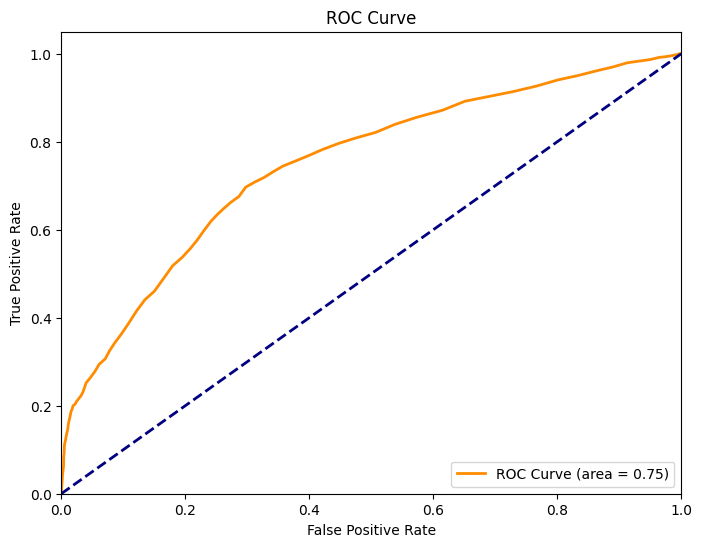

In [179]:
fpr, tpr, thresholds = roc_curve(y_test, positive_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

This code is used to visualize the ROC curve (Receiver Operating Characteristic curve) and calculate the AUC-ROC score for a binary classification model.

First the true positive and false positive rates are calculated for the classes predicted by the model, and then these quantities are used to calculate the Area Under the Curve (AUC) using false positive rates (fpr) and true positive rates (tpr).

### Gradient Boosting & SVM (Optional)

#### Gradient Boosting

In [180]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [181]:
gb_clf = GradientBoostingClassifier()
print("Default parameters of Gradient Boosting:")
print(gb_clf.get_params())

Default parameters of Gradient Boosting:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [182]:
gb_clf.fit(X_train_encoded, y_train)

GradientBoostingClassifier()

In [183]:
positive_probs = gb_clf.predict_proba(X_test_encoded)[:, 1]

auc_roc_gb = roc_auc_score(y_test, positive_probs)
print("AUC-ROC Score:", auc_roc_gb)

AUC-ROC Score: 0.7482092463200418


In [184]:
predictions = gb_clf.predict(X_test_encoded)

conf_matrix = confusion_matrix(y_test, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.250187265917603
Specificity (True Negative Rate): 0.9621061029118468


In [185]:
predictions = gb_clf.predict(X_test_encoded)

accuracy_gb = accuracy_score(y_test, predictions)
print(f'Accuracy of model: {accuracy_gb}')


precision_gb = precision_score(y_test, predictions, average=None)
recall_gb = recall_score(y_test, predictions, average=None)
f1_gb = f1_score(y_test, predictions, average=None)

print(f'Precision: {precision_gb}')
print(f'Recall: {recall_gb}')
print(f'F1-score: {f1_gb}')

class_names = ["Negative", "Positive"]
print(classification_report(y_test, predictions, target_names=class_names))

Accuracy of model: 0.7147319104633003
Precision: [0.70670964 0.77855478]
Recall: [0.9621061  0.25018727]
F1-score: [0.81486486 0.37868481]
              precision    recall  f1-score   support

    Negative       0.71      0.96      0.81      5014
    Positive       0.78      0.25      0.38      2670

    accuracy                           0.71      7684
   macro avg       0.74      0.61      0.60      7684
weighted avg       0.73      0.71      0.66      7684



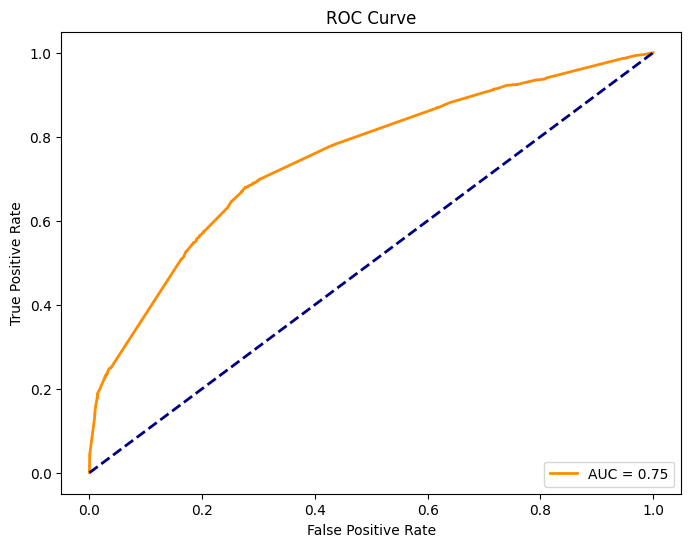

In [186]:
probabilities = gb_clf.decision_function(X_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### SVM

In [63]:
from sklearn.svm import SVC

svm_classifier = SVC(probability=True)

print("Default parameters of SVM Classifier:")
print(svm_classifier.get_params())

Default parameters of SVM Classifier:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [64]:
svm_classifier.fit(X_train_encoded, y_train)

SVC(probability=True)

In [65]:
positive_probs = svm_classifier.predict_proba(X_test_encoded)[:, 1]


auc_roc_svm = roc_auc_score(y_test, positive_probs)
print("AUC-ROC Score:", auc_roc_svm)

AUC-ROC Score: 0.7026786421241498


In [66]:
predictions = svm_classifier.predict(X_test_encoded)

conf_matrix = confusion_matrix(y_test, predictions)

true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()


sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.0
Specificity (True Negative Rate): 1.0


In [67]:
predictions = svm_classifier.predict(X_test_encoded)

accuracy_svm = accuracy_score(y_test, predictions)
print(f'Accuracy of model: {accuracy_svm}')


precision_smv = precision_score(y_test, predictions, average=None)
recall_svm = recall_score(y_test, predictions, average=None)
f1_svm = f1_score(y_test, predictions, average=None)

print(f'Precision: {precision_smv}')
print(f'Recall: {recall_svm}')
print(f'F1-score: {f1_svm}')

class_names = ["Negative", "Positive"]
print(classification_report(y_test, predictions, target_names=class_names))

Accuracy of model: 0.6525247267048412
Precision: [0.65252473 0.        ]
Recall: [1. 0.]
F1-score: [0.78973067 0.        ]
              precision    recall  f1-score   support

    Negative       0.65      1.00      0.79      5014
    Positive       0.00      0.00      0.00      2670

    accuracy                           0.65      7684
   macro avg       0.33      0.50      0.39      7684
weighted avg       0.43      0.65      0.52      7684



/Users/ermarinellone/Library/Mobile Documents/com~apple~CloudDocs/BDS/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ermarinellone/Library/Mobile Documents/com~apple~CloudDocs/BDS/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ermarinellone/Library/Mobile Documents/com~apple~CloudDocs/BDS/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sa

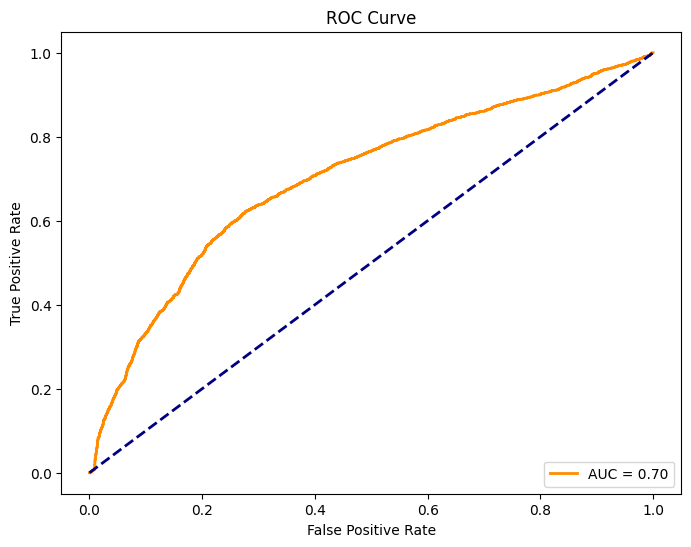

In [68]:
probabilities = svm_classifier.decision_function(X_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Results

In [69]:
res = {
    'Models': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine'],
    'Accuracy': [accuracy_rf,accuracy_gb,accuracy_svm],
    'AUC-ROC-Score': [auc_roc_rf, auc_roc_gb, auc_roc_svm],

}


results = pd.DataFrame(res)
display(HTML(results.to_html(index=False)))

Models,Accuracy,AUC-ROC-Score
Random Forest,0.717725,0.744078
Gradient Boosting,0.715773,0.748616
Support Vector Machine,0.652525,0.702679
